In [2]:
import pandas as pd
import xarray as xr
from pathlib import Path
import datetime
from cftime import num2date
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Define the folder path containing the NetCDF files
folder_path = Path('inputs\WindData')
datasets = []  # List to store datasets

for file in folder_path.iterdir():
    ds = xr.open_dataset(file)  # Open each NetCDF file
    datasets.append(ds)  # Store dataset in list

# Concatenate along a specific dimension (e.g., 'time' if it exists)
combined_ds = xr.concat(datasets, dim='valid_time')

# Convert the combined dataset to a pandas DataFrame
WindData = combined_ds.to_dataframe().reset_index()


In [4]:
# Display the combined dataset
WindData

,valid_time,latitude,longitude,number,expver,u10,v10,u100,v100
0,1997-01-01 00:00:00,8.00,55.50,0,0001,-5.129883,-7.070343,-5.775009,-7.893539
1,1997-01-01 00:00:00,8.00,55.75,0,0001,-5.128906,-7.074249,-5.767197,-7.916000
2,1997-01-01 00:00:00,7.75,55.50,0,0001,-5.064453,-7.151398,-5.692978,-7.980453
3,1997-01-01 00:00:00,7.75,55.75,0,0001,-5.052734,-7.126007,-5.681259,-7.950180
4,1997-01-01 01:00:00,8.00,55.50,0,0001,-5.460739,-7.175369,-6.158142,-8.034683
...,...,...,...,...,...,...,...,...,...
946651,2023-12-31 22:00:00,7.75,55.75,0,0001,-4.193115,-4.812347,-4.692459,-5.313354
946652,2023-12-31 23:00:00,8.00,55.50,0,0001,-3.792526,-5.225235,-4.245819,-5.772034
946653,2023-12-31 23:00:00,8.00,55.75,0,0001,-3.910690,-5.023087,-4.380585,-5.562073
946654,2023-12-31 23:00:00,7.75,55.50,0,0001,-3.795456,-5.147110,-4.232147,-5.684143


In [ ]:
# Separate the wind speeds in the four different points, using the latitude and longitude information

WindData = WindData.rename(columns={'number': 'location'}) # Change the meaning of the existing column 'number' which was not being used

WindData['location'] = list(zip(WindData['latitude'], WindData['longitude'])) # Combines latitude and longitude on the column location



In [6]:
WindData

,valid_time,latitude,longitude,location,expver,u10,v10,u100,v100
0,1997-01-01 00:00:00,8.00,55.50,"(8.0, 55.5)",0001,-5.129883,-7.070343,-5.775009,-7.893539
1,1997-01-01 00:00:00,8.00,55.75,"(8.0, 55.75)",0001,-5.128906,-7.074249,-5.767197,-7.916000
2,1997-01-01 00:00:00,7.75,55.50,"(7.75, 55.5)",0001,-5.064453,-7.151398,-5.692978,-7.980453
3,1997-01-01 00:00:00,7.75,55.75,"(7.75, 55.75)",0001,-5.052734,-7.126007,-5.681259,-7.950180
4,1997-01-01 01:00:00,8.00,55.50,"(8.0, 55.5)",0001,-5.460739,-7.175369,-6.158142,-8.034683
...,...,...,...,...,...,...,...,...,...
946651,2023-12-31 22:00:00,7.75,55.75,"(7.75, 55.75)",0001,-4.193115,-4.812347,-4.692459,-5.313354
946652,2023-12-31 23:00:00,8.00,55.50,"(8.0, 55.5)",0001,-3.792526,-5.225235,-4.245819,-5.772034
946653,2023-12-31 23:00:00,8.00,55.75,"(8.0, 55.75)",0001,-3.910690,-5.023087,-4.380585,-5.562073
946654,2023-12-31 23:00:00,7.75,55.50,"(7.75, 55.5)",0001,-3.795456,-5.147110,-4.232147,-5.684143


In [10]:
# Convert from cartessian cordinates of velocity to polar coordinates to obtain wind direction and speed, for every location

WindData['ws_10'] = (WindData['u10']**2 + WindData['v10']**2)**0.5
WindData['wd_10'] = (np.arctan2(WindData['u10'], WindData['v10']) * 360 / (2 * np.pi)) % 360  # Wind direction in degrees (0, 360)



WindData['ws_100'] = (WindData['u100']**2 + WindData['v100']**2)**0.5
WindData['wd_100'] = (np.arctan2(WindData['u100'], WindData['v100']) * 360 / (2 * np.pi)) % 360  # Wind direction in degrees

#separate the wind speeds in the four locations
Location_1 = WindData[WindData['location'] == (7.75, 55.5)]
Location_2 = WindData[WindData['location'] == (8, 55.5)]
Location_3 = WindData[WindData['location'] == (7.75, 55.75)]
Location_4 = WindData[WindData['location'] == (8, 55.75)]

Location_1


,valid_time,latitude,longitude,location,expver,u10,v10,u100,v100,ws_10,wd_10,ws_100,wd_100
2,1997-01-01 00:00:00,7.75,55.5,"(7.75, 55.5)",0001,-5.064453,-7.151398,-5.692978,-7.980453,8.763058,215.305252,9.802940,215.502747
6,1997-01-01 01:00:00,7.75,55.5,"(7.75, 55.5)",0001,-5.412888,-7.168533,-6.093689,-8.018082,8.982607,217.056091,10.070883,217.234604
10,1997-01-01 02:00:00,7.75,55.5,"(7.75, 55.5)",0001,-5.794968,-7.286667,-6.540344,-8.170639,9.310057,218.494659,10.465919,218.676193
14,1997-01-01 03:00:00,7.75,55.5,"(7.75, 55.5)",0001,-6.116409,-7.345795,-6.927292,-8.274216,9.558826,219.782150,10.791201,219.936554
18,1997-01-01 04:00:00,7.75,55.5,"(7.75, 55.5)",0001,-6.399673,-7.414078,-7.274658,-8.381561,9.794099,220.800064,11.098253,220.955887
...,...,...,...,...,...,...,...,...,...,...,...,...,...
946638,2023-12-31 19:00:00,7.75,55.5,"(7.75, 55.5)",0001,-5.853882,-5.125351,-6.685028,-5.842255,7.780563,228.796310,8.878150,228.848770
946642,2023-12-31 20:00:00,7.75,55.5,"(7.75, 55.5)",0001,-5.822296,-4.957687,-6.579819,-5.582153,7.647078,229.585602,8.628699,229.689575
946646,2023-12-31 21:00:00,7.75,55.5,"(7.75, 55.5)",0001,-5.104568,-4.827011,-5.758743,-5.412628,7.025429,226.600830,7.903143,226.774597
946650,2023-12-31 22:00:00,7.75,55.5,"(7.75, 55.5)",0001,-4.149170,-5.090668,-4.661209,-5.626831,6.567382,219.181900,7.306716,219.638000


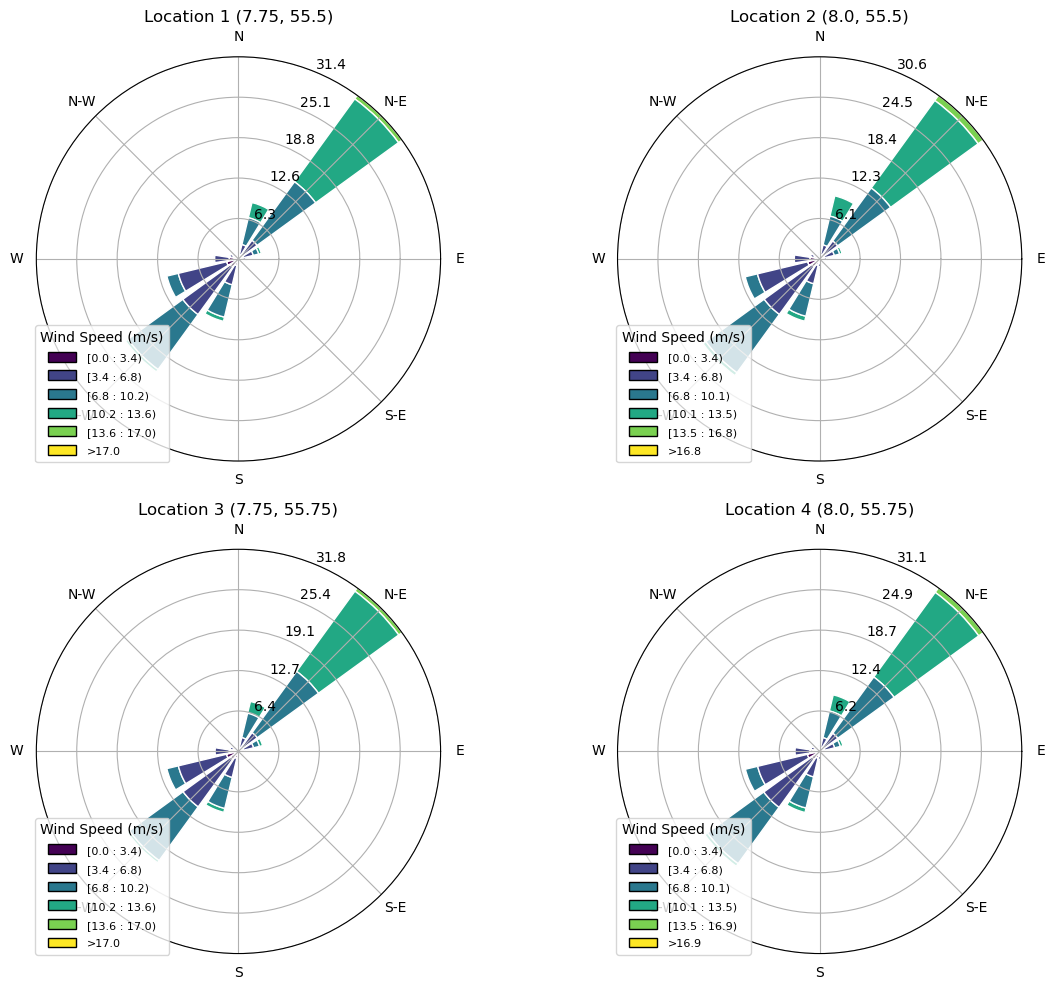

In [ ]:
from windrose import WindroseAxes

# Create a 2x2 subplot for wind rose plots
fig, axes = plt.subplots(2, 2, subplot_kw={'projection': 'windrose'}, figsize=(12, 10))

# Plot for Location_1
axes[0, 0].bar(Location_1['wd_10'], Location_1['ws_10'], normed=True, opening=0.8, edgecolor='white')
axes[0, 0].set_title("Location 1 (7.75, 55.5)")
axes[0, 0].set_legend(title="Wind Speed (m/s)", loc='lower right')

# Plot for Location_2
axes[0, 1].bar(Location_2['wd_10'], Location_2['ws_10'], normed=True, opening=0.8, edgecolor='white')
axes[0, 1].set_title("Location 2 (8.0, 55.5)")
axes[0, 1].set_legend(title="Wind Speed (m/s)", loc='lower right')

# Plot for Location_3
axes[1, 0].bar(Location_3['wd_10'], Location_3['ws_10'], normed=True, opening=0.8, edgecolor='white')
axes[1, 0].set_title("Location 3 (7.75, 55.75)")
axes[1, 0].set_legend(title="Wind Speed (m/s)", loc='lower right')

# Plot for Location_4
axes[1, 1].bar(Location_4['wd_10'], Location_4['ws_10'], normed=True, opening=0.8, edgecolor='white')
axes[1, 1].set_title("Location 4 (8.0, 55.75)")
axes[1, 1].set_legend(title="Wind Speed (m/s)", loc='lower right')

plt.tight_layout()
plt.show()

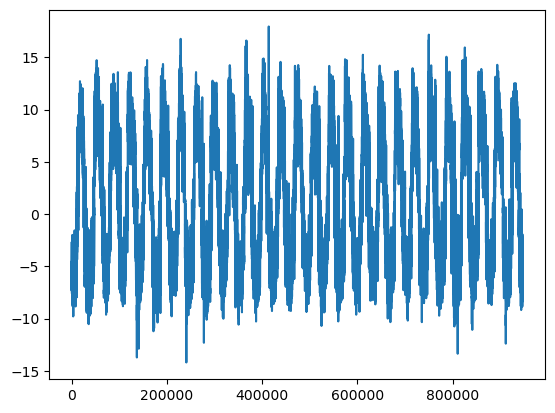

In [ ]:
from scipy.interpolate import griddata

# Coordinates of the four points (latitude, longitude)
points = np.array([
    [7.75, 55.5],  # Point 1
    [8, 55.5],  # Point 2
    [7.75, 55.75],  # Point 3
    [8, 55.75]   # Point 4
])

# Wind speeds at the four points
wind_speeds = np.array([5.1, 4.2, 5.0, 3.3])

# Wind directions at the four points (in degrees)
wind_directions = np.array([30, 45, 60, 75])

# Coordinate of the point within the box where you want to interpolate
target_point = np.array([[15.15, 55.55]])

interpolated_speed = griddata(points, wind_speeds, target_point, method='linear')


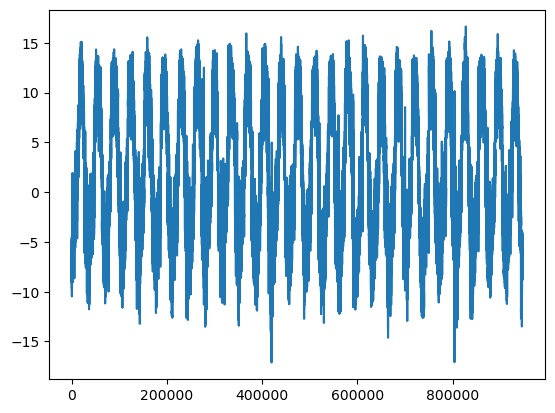

In [8]:
plt.plot(WindData['v100'])